# Hypothesis Testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Hypothesis Testing on recycled waste

In [2]:
df = pd.read_csv('../data/cleaned_data/cleaned_data_final.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,location_code,location,time,location_time,incinerated_waste,landfilled_waste,littered_waste,mismanaged_waste,recycled_waste,total_waste,total_leakage,total_use,total_waste_collected_recyc
0,CAN1,Canada,2000,CAN12000,0.151097,3.386902,0.008696,0.485324,0.127029,4.159048,0.109,5.5582,0.258
1,CAN1,Canada,2001,CAN12001,0.156862,3.495910,0.008903,0.490428,0.138619,4.290722,0.110,5.5922,0.281
2,CAN1,Canada,2002,CAN12002,0.164828,3.649937,0.009273,0.500955,0.152728,4.477721,0.113,5.8427,0.308
3,CAN1,Canada,2003,CAN12003,0.172013,3.785881,0.009570,0.508120,0.166722,4.642306,0.114,5.9738,0.335
4,CAN1,Canada,2004,CAN12004,0.180220,3.941340,0.009938,0.516935,0.182366,4.830799,0.117,6.2353,0.366


In [3]:
df.dropna(inplace=True)

In [4]:
df.isna().sum()

location_code                  0
location                       0
time                           0
location_time                  0
incinerated_waste              0
landfilled_waste               0
littered_waste                 0
mismanaged_waste               0
recycled_waste                 0
total_waste                    0
total_leakage                  0
total_use                      0
total_waste_collected_recyc    0
dtype: int64

In [5]:
df_grouped = df.groupby('location').agg({'total_waste':'sum', 'recycled_waste':'sum'}).reset_index()
df_grouped

,location,total_waste,recycled_waste
0,Canada,110.042767,5.380075
1,China,802.704695,78.506480
2,India,191.609398,20.101067
3,Latin America,255.042774,21.082438
4,Middle East & North Africa,229.539931,10.009368
5,OECD Asia,174.197109,14.995849
6,OECD EU,846.695562,84.548371
7,OECD Non-EU,244.953892,13.437711
8,OECD Oceania,21.103124,1.204500
9,Other Africa,16.249045,0.929337


In [6]:
df['recyc_waste_ratio'] = df['recycled_waste']/ df['total_waste']

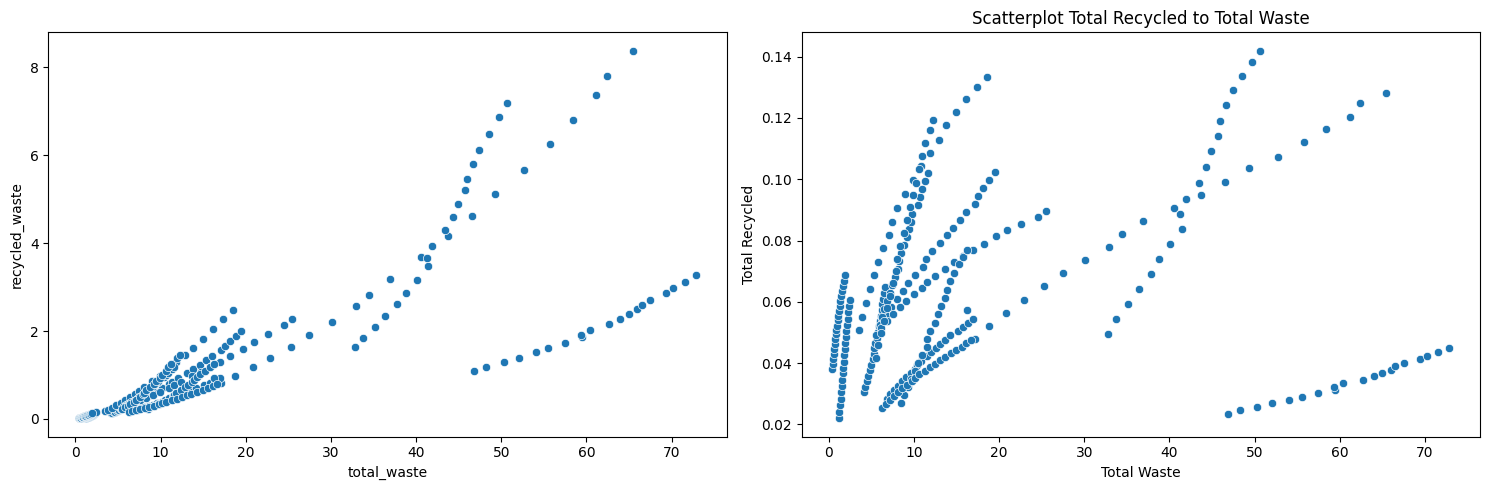

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(df, y='recycled_waste', x='total_waste', ax=ax[0])
plt.xlabel('Total Waste')
plt.ylabel('Total Recycled')
plt.title('Scatterplot Total Recycled to Total Waste')
plt.tight_layout()

sns.scatterplot(df, y='recyc_waste_ratio', x='total_waste', ax=ax[1])
plt.xlabel('Total Waste')
plt.ylabel('Total Recycled')
plt.title('Scatterplot Total Recycled to Total Waste')
plt.tight_layout()
plt.show()

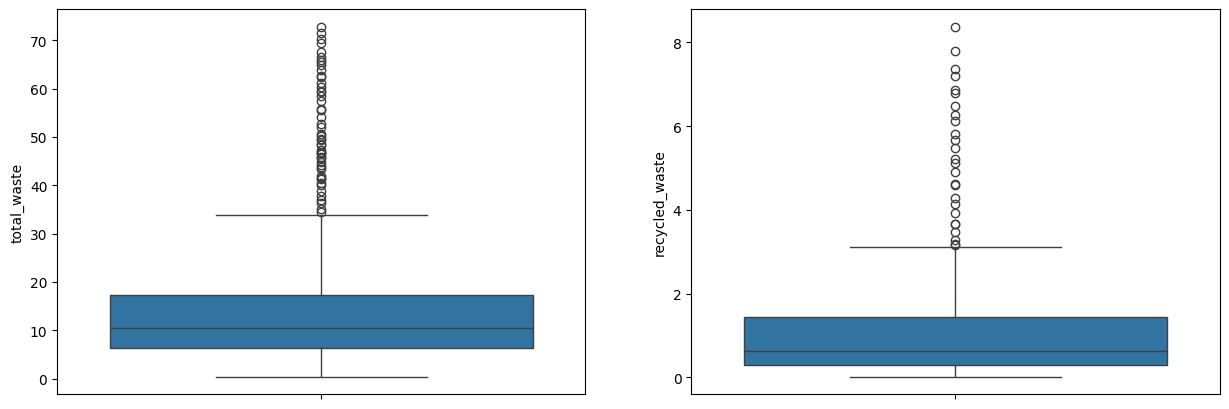

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(df, y='total_waste', ax=ax[0])
sns.boxplot(df, y='recycled_waste',ax=ax[1])
plt.show()

In [9]:
corr_matrix = df[['recycled_waste','total_waste', 'recyc_waste_ratio']].corr()
corr_matrix

,recycled_waste,total_waste,recyc_waste_ratio
recycled_waste,1.000000,0.804029,0.641453
total_waste,0.804029,1.000000,0.231916
recyc_waste_ratio,0.641453,0.231916,1.000000


In [10]:
#If skewness is less than -1 or greater than 1, the distribution is highly skewed and needs transforming.
df[['recycled_waste','total_waste', 'recyc_waste_ratio']].skew()

recycled_waste       2.406152
total_waste          1.579449
recyc_waste_ratio    0.762033
dtype: float64

In [11]:
import pickle
from sklearn.preprocessing import PowerTransformer

df2 = df[['recycled_waste','total_waste', 'recyc_waste_ratio']]

transformer = PowerTransformer(method='yeo-johnson')

transformed = transformer.fit_transform(df2)
df_transformed = pd.DataFrame(transformed, columns=df2.columns)

path = "./transformers/"
file_name = "transf_recycled_total_waste.pkl"

with open(path + file_name, "wb") as file:
    pickle.dump(transformer, file)

In [12]:
df_transformed.describe()

,recycled_waste,total_waste,recyc_waste_ratio
count,2.810000e+02,2.810000e+02,2.810000e+02
mean,7.585866e-17,-3.792933e-17,5.815830e-16
std,1.001784e+00,1.001784e+00,1.001784e+00
min,-1.668182e+00,-2.203682e+00,-2.031419e+00
25%,-7.626801e-01,-5.237077e-01,-7.786697e-01
50%,-6.632683e-02,-3.848513e-02,-4.537382e-02
75%,7.719370e-01,4.579379e-01,8.013768e-01
max,2.022310e+00,1.956920e+00,2.094729e+00


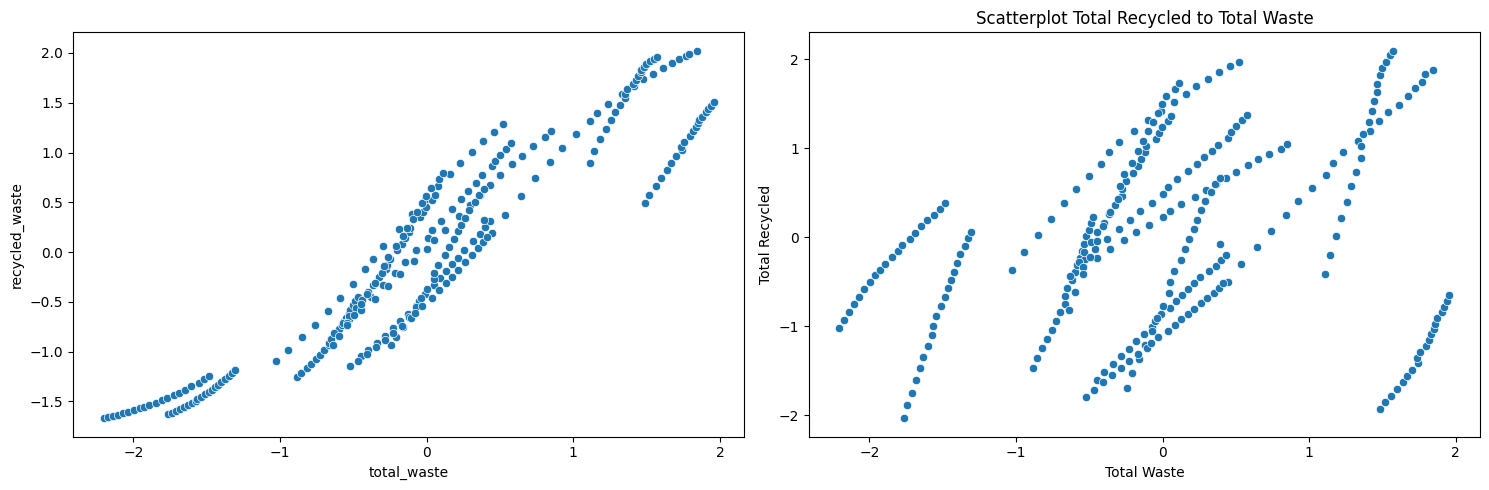

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(df_transformed, y='recycled_waste', x='total_waste', ax=ax[0])
plt.xlabel('Total Waste')
plt.ylabel('Total Recycled')
plt.title('Scatterplot Total Recycled to Total Waste')
plt.tight_layout()

sns.scatterplot(df_transformed, y='recyc_waste_ratio', x='total_waste', ax=ax[1])
plt.xlabel('Total Waste')
plt.ylabel('Total Recycled')
plt.title('Scatterplot Total Recycled to Total Waste')
plt.tight_layout()
plt.show()

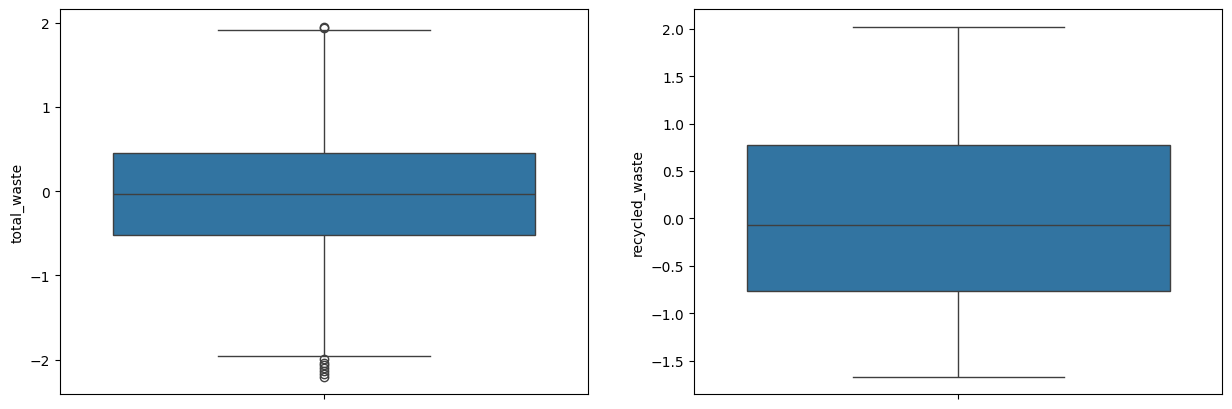

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(df_transformed, y='total_waste', ax=ax[0])
sns.boxplot(df_transformed, y='recycled_waste',ax=ax[1])
plt.show()

### Hypothesis Test if recycled waste is dependent on total waste

H0: Recycled waste is not dependent on total waste


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df_transformed[['total_waste']]
y = df_transformed['recyc_waste_ratio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

path = "./models/"
file_name = "lr_recycled_waste_total_waste.pkl"

with open(path + file_name, "wb") as file:
    pickle.dump(model, file)

In [16]:
#Statistical Testing:

In [17]:
print(f'Coefficient for total_waste: {model.coef_[0]}')

Coefficient for total_waste: 0.28870037846109087


In [18]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(X_train['total_waste'], y_train)
print(f'P-value: {p_value}')

P-value: 5.2418806489955905e-06


In [19]:
print(model.coef_[0])
p_value<model.coef_[0]

0.28870037846109087


True

In [20]:
# Testing if the H0 needs to be rejected and determine if the overall model is statistically significant
if p_value<0.05:
    print("Reject H0")
else: print("Don't reject H0")

Reject H0


The coefficient of 0.00046 for 'total_waste' means that for every one-unit increase in the 'total_waste' variable, the predicted value of the response variable (recycling) increases by approximately 0.2887 units. 

The p-value being very close to zero suggests that this relationship is statistically significant, supporting the idea that higher total waste corresponds to increased recycling.

The significance level of 0.05 indicates strong evidence against the null hypothesis. This means the null hypothesis is rejected in favor of the alternative hypothesis. Essentially, it supports the claim that there is a relationship between the 'total_waste' variable and the recycling.

### Hypothesis testing if the recycled amount varies across OECD and non OECD countries

HO: Recycled-waste-ratio is not significantly higher in OECD countries in comparison to non OECD countries.

In [21]:
no_oecd_member = ['China', 'India', 'Latin America', 'Middle East & North Africa', 'Other Africa', 'Other EU', 'Other Eurasia', 'Other non-OECD Asia']

In [22]:
# Function to map locations to OECD or non-OECD
def assign_oecd_status(location):
    if location in no_oecd_member:
        return 'no OECD'
    else:
        return 'OECD'

# Create a new column 'OECD_Status' based on the location column
df['oecd_status'] = df['location'].apply(lambda x: assign_oecd_status(x))

In [23]:
df_oecd = df[(df['oecd_status']=='OECD')]
df_non_oecd = df[(df['oecd_status']!='OECD')]

# no transformation needed here. skew was in range
df_oecd = df_oecd['recyc_waste_ratio']
df_non_oecd = df_non_oecd['recyc_waste_ratio']

In [24]:
df_oecd.describe()

count    140.000000
mean       0.062998
std        0.026792
min        0.023451
25%        0.042633
50%        0.057820
75%        0.077144
max        0.141962
Name: recyc_waste_ratio, dtype: float64

In [25]:
df_non_oecd.describe()

count    141.000000
mean       0.064022
std        0.027452
min        0.022009
25%        0.042234
50%        0.058152
75%        0.082056
max        0.133331
Name: recyc_waste_ratio, dtype: float64

In [38]:
from scipy import stats

# Assuming you have your data in two arrays: oecd_data and non_oecd_data
# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(df_oecd, df_non_oecd, equal_var=False)

path = "./transformers/"
file_name = "t_test_results.pkl"

with open(path + file_name, "wb") as file:
    pickle.dump({'t_stat': t_stat, 'p_value': p_value}, file)

# Analyze the p-value
alpha = 0.05  # significance level
print(p_value)
if p_value < alpha:
    print("There is a statistically significant difference between OECD and non-OECD countries.")
else:
    print("There is no statistically significant difference.")

0.751866762244933
There is no statistically significant difference.


With a p-value of 0.7518, which is higher than the typical significance level of 0.05, there isn't sufficient evidence to reject the null hypothesis. Therefore, based on this analysis, the recycled-waste-ratio is not significantly higher in OECD countries compared to non-OECD countries.

## Hypothesis Testing of GDP influence on Plastic Waste Generation

HYPOTHESIS TESTING: linear regression analysis

Hypothesis H0: plastic waste per capita is not dependent on GDP per Capita.

In [27]:
gdp_df_2010 = pd.read_csv('../data/cleaned_data/2010_gdp_pop_final.csv')

In [28]:
correlation = gdp_df_2010['gdp_per_capita'].corr(gdp_df_2010['per_capita_plastic_waste'])
correlation

0.3679486421928206

A correlation of 0.37 suggests a moderate positive relationship.
The correlation is positive --> indicates that as the values of one variable increase the values of the other variable tend to increase as well

In [29]:
correlation = gdp_df_2010['population'].corr(gdp_df_2010['per_capita_plastic_waste'])
correlation

-0.127669134793611

Relatively weak negative correlation, indicating that the relationship between these two variables is not very strong between the population size and per capita plastic waste.

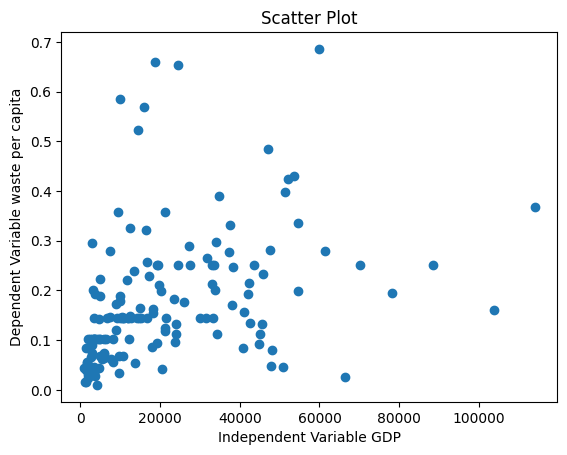

In [30]:
plt.scatter(gdp_df_2010['gdp_per_capita'], gdp_df_2010['per_capita_plastic_waste'])
plt.xlabel('Independent Variable GDP')
plt.ylabel('Dependent Variable waste per capita')
plt.title('Scatter Plot')
plt.show()

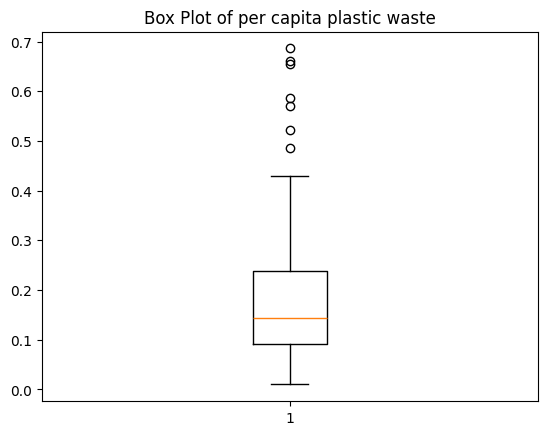

In [31]:
plt.boxplot(gdp_df_2010['per_capita_plastic_waste'])
plt.title('Box Plot of per capita plastic waste')
plt.show()

In [32]:
#If skewness is less than -1 or greater than 1, the distribution is highly skewed and needs transforming.
gdp_df_2010[['gdp_per_capita', 'per_capita_plastic_waste']].skew()

gdp_per_capita              1.672773
per_capita_plastic_waste    1.676290
dtype: float64

In [33]:
from sklearn.preprocessing import PowerTransformer

gdp_df2 = gdp_df_2010[['gdp_per_capita', 'per_capita_plastic_waste']]

transformer2 = PowerTransformer(method='yeo-johnson')

transformed2 = transformer2.fit_transform(gdp_df2)
df_transformed2 = pd.DataFrame(transformed2, columns=gdp_df2.columns)

path = "./transformers/"
file_name = "transf_gdp_per_capita_waste.pkl"

with open(path + file_name, "wb") as file:
    pickle.dump(transformer2, file)

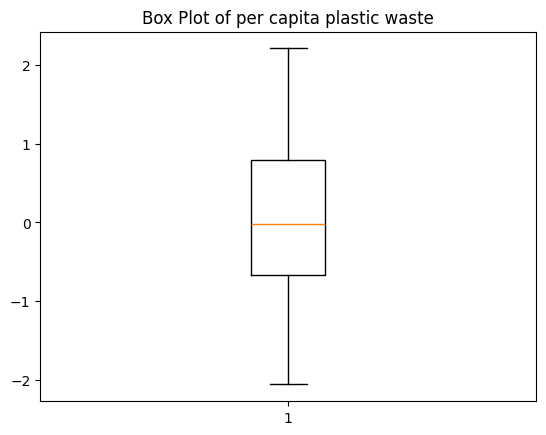

In [34]:
plt.boxplot(df_transformed2['per_capita_plastic_waste'])
plt.title('Box Plot of per capita plastic waste')
plt.show()

In [35]:
X = df_transformed2[['gdp_per_capita']]
y = df_transformed2['per_capita_plastic_waste']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model2 = LinearRegression()

# Fit the model to the training data
model2.fit(X_train, y_train)

# Print the coefficient for gdp_per_capita
print(f'Coefficient for gdp_per_capita: {model2.coef_[0]}')

# Statistical Test
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(X_train['gdp_per_capita'], y_train)
print(f'P-value: {p_value}')

path = "./models/"
file_name = "lr_gdp_per_capita_waste.pkl"

with open(path + file_name, "wb") as file:
    pickle.dump(model2, file)

Coefficient for gdp_per_capita: 0.6124734511002157
P-value: 3.528899900678378e-13


In [36]:
print(p_value<model2.coef_[0])

# Testing if the H0 needs to be rejected and determine if the overall model is statistically significant
if p_value<0.05:
    print("Reject H0")
else: print("Don't reject H0")

True
Reject H0


The coefficient for gdp_per_capita of approximately 0.612 indicates that, in the context of the analysis and after transformations, for every one-unit increase in the transformed GDP per capita, the transformed plastic waste per capita increases by approximately 0.612 units, assuming other variables remain constant.

With a p-value of 3.53e-13, which is significantly lower than the significance level of 0.05, there is a strong evidence to reject the null hypothesis, implying that this acknowledges that plastic waste per capita is indeed related to or dependent on GDP per capita, as suggested by the statistical analysis.

The statistically significant relationship found between GDP per capita and plastic waste per capita suggests that there is an association between these variables, supporting the alternative hypothesis (H1) that there is some relationship or dependence between the two.